In [1]:
import sys
sys.path.append('./training')
sys.path.append('./training_data')
import train_standard_NN
import train_BLL
import train_CQR
import save
from data_class import DataClass
from simulation_evaluation import simulation_evaluation

In [4]:
# training data set
training_name = './training data/training.xlsx'
test_name = './training data/test.xlsx'

# load data
training_data_dict, training_meta_data = save.read_excel(training_name)
test_data_dict, meta_data_test = save.read_excel(test_name)

# define keys from data sets which should be used for training
keys_states = ['T_PM', 'T_TM', 'c', 'd10', 'd50', 'd90']
keys_inputs = ['mf_PM', 'mf_TM', 'Q_g', 'w_crystal']

# define lag parameter l of NARX
l = 4

# define training parameters (rest will be different for different methods for best results in each case)
n_neurons = 30

# test data dataclass
test_data = DataClass(test_data_dict, keys_states, keys_inputs, l)

C:\Users\smcojohn\AppData\Local\miniconda3\envs\stochastic_sfc\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/2000, Train Loss: 0.11120272100575872, Val Loss: 0.09006242570318994, LR: 0.01
Epoch 11/2000, Train Loss: 0.10072238187956098, Val Loss: 0.09849921099034845, LR: 0.01
Epoch 21/2000, Train Loss: 0.10147825716484661, Val Loss: 0.08925579682846738, LR: 0.01
Epoch 31/2000, Train Loss: 0.10163407775693988, Val Loss: 0.08862765180836817, LR: 0.01
Epoch 41/2000, Train Loss: 0.10051058370959157, Val Loss: 0.08978080661718253, LR: 0.01
Epoch 51/2000, Train Loss: 0.10175988284253633, Val Loss: 0.08955806920862501, LR: 0.01
Epoch 61/2000, Train Loss: 0.10136480726948165, Val Loss: 0.08664353958265797, LR: 0.01
Epoch 71/2000, Train Loss: 0.10174758484054511, Val Loss: 0.08996615945628494, LR: 0.01
Epoch 81/2000, Train Loss: 0.10030646623108287, Val Loss: 0.09599922844179117, LR: 0.01
Epoch 91/2000, Train Loss: 0.10179573728850014, Val Loss: 0.086691978132459, LR: 0.01
Epoch 101/2000, Train Loss: 0.09637733269880286, Val Loss: 0.08586804464364507, LR: 0.005
Epoch 111/2000, Train Loss: 0.096

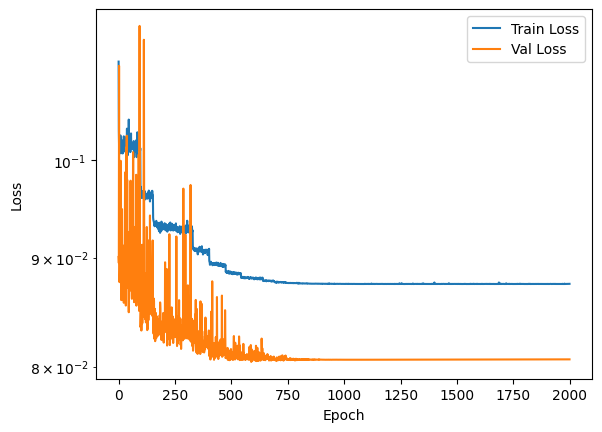

In [5]:
# train standard NN
training_data_NN = DataClass(training_data_dict, keys_states, keys_inputs, l)

model_NN = train_standard_NN.Approximate(training_data_NN, training_meta_data)
model_NN.setup(n_neurons=n_neurons, n_epochs=2000, learning_rate=0.01, weight_decay=1e-4, patience=50, lr_scheduler_factor=0.5)
model_NN.train()
# generate symbolic casadi function
model_NN.get_casadi_model()
# save model
model_NN.save('./data based models/NN_model.pkl')

MSE prediction: 0.002751363774634601
Average MSE: 0.006615575727583225


{'x': array([[3.18405452e+02, 3.18184619e+02, 1.87216023e-01, 2.62054442e-04,
         2.96539027e-04, 3.73816437e-04],
        [3.18405452e+02, 3.18184619e+02, 1.87180823e-01, 2.55695953e-04,
         2.97856000e-04, 3.48913470e-04],
        [3.18405452e+02, 3.18184619e+02, 1.87202624e-01, 2.48649626e-04,
         2.93956376e-04, 3.97383085e-04],
        ...,
        [3.17523665e+02, 3.17429626e+02, 1.81899052e-01, 3.08196965e-04,
         3.68375774e-04, 4.47860797e-04],
        [3.17540342e+02, 3.17428952e+02, 1.81901225e-01, 3.15119705e-04,
         3.49753883e-04, 4.04994557e-04],
        [3.17540255e+02, 3.17428813e+02, 1.82114203e-01, 3.11518570e-04,
         3.76505045e-04, 4.53120588e-04]]),
 'u': array([[7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.0000

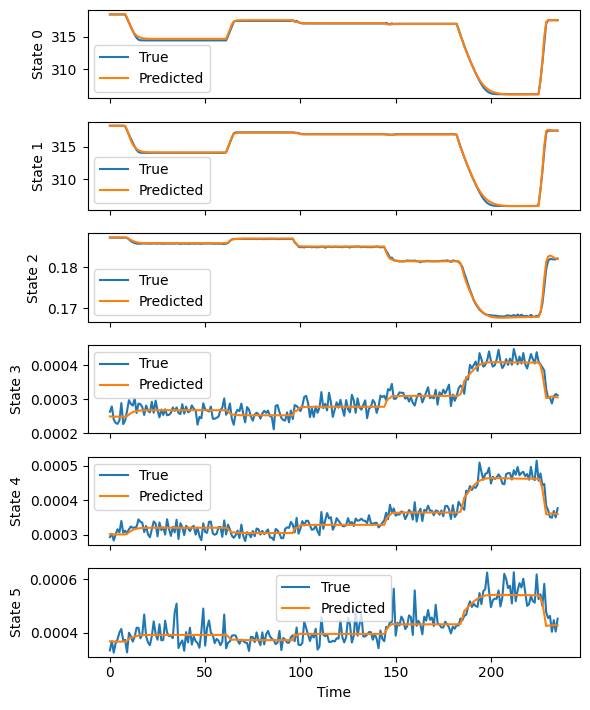

In [6]:
# test NN model
simulation_evaluation(test_data.states, test_data.inputs, model_NN, states=len(keys_states), data_test=test_data)

C:\Users\smcojohn\AppData\Local\miniconda3\envs\stochastic_sfc\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/2000, Train Loss: 0.19402299761009623, Val Loss: 0.15862597031578138, LR: 0.001
Epoch 11/2000, Train Loss: 0.15077186850056465, Val Loss: 0.14784885643963602, LR: 0.001
Epoch 21/2000, Train Loss: 0.14873143767656039, Val Loss: 0.14682195321389824, LR: 0.001
Epoch 31/2000, Train Loss: 0.14817783536750878, Val Loss: 0.1459574053526684, LR: 0.001
Epoch 41/2000, Train Loss: 0.14781699573466264, Val Loss: 0.14611496553299533, LR: 0.001
Epoch 51/2000, Train Loss: 0.14646201588705912, Val Loss: 0.14627544297154543, LR: 0.0005
Epoch 61/2000, Train Loss: 0.14566157707400412, Val Loss: 0.14415757016391512, LR: 0.00025
Epoch 71/2000, Train Loss: 0.14547509506249479, Val Loss: 0.14470501348471185, LR: 0.00025
Epoch 81/2000, Train Loss: 0.14508636145671802, Val Loss: 0.1440532995257408, LR: 0.000125
Epoch 91/2000, Train Loss: 0.14503906269285724, Val Loss: 0.14385473756653488, LR: 0.000125
Epoch 101/2000, Train Loss: 0.1450516980117572, Val Loss: 0.1438423339158866, LR: 0.000125
Epoch 111/2

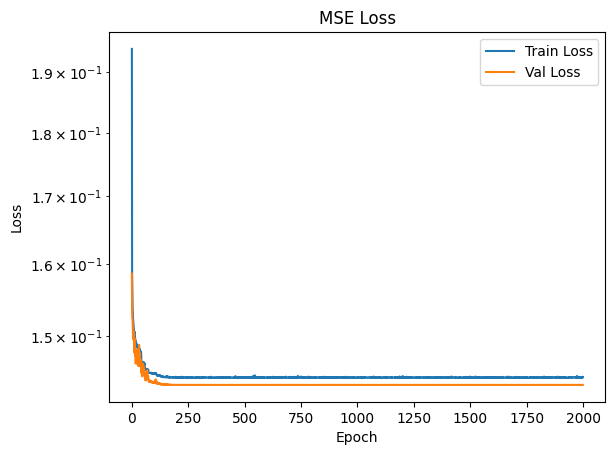

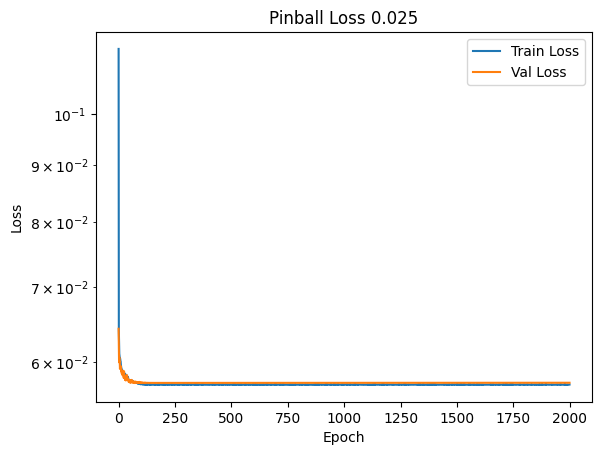

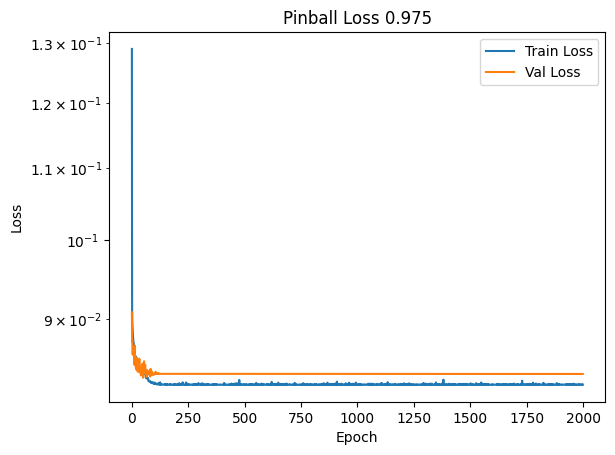

In [7]:
# train CQR model
training_data_CQR = DataClass(training_data_dict, keys_states, keys_inputs, l,  split_in_three=True)  # different because of needed calibration dataset

# define miscoverage rate
alpha = 0.05
quantiles = [alpha / 2, 1 - alpha / 2]

model_CQR = train_CQR.Approximate(training_data_CQR, quantiles, alpha, training_meta_data)
model_CQR.setup(n_neurons_mean=n_neurons, n_neurons_quantiles=10, batch_size=32, n_epochs_mean=2000,
                n_epochs_quantiles=2000, learning_rate=0.001, weight_decay_MSE=2e-5, weight_decay_quantiles=2e-5,
                patience_MSE=10, patience_quantiles=10, lr_scheduler_factor_MSE=0.5,
                lr_scheduler_factor_quantiles=0.5)
model_CQR.train()
# generate symbolic casadi function
model_CQR.get_casadi_model()
# save model
model_CQR.save('./data based models/CQR_model.pkl')

Coverage: 0.9548022598870056
MSE prediction: 0.0011291330023673702
Average MSE: 0.011395312739896094


{'x': array([[3.18405452e+02, 3.18184619e+02, 1.87216023e-01, 2.62054442e-04,
         2.96539027e-04, 3.73816437e-04],
        [3.18405452e+02, 3.18184619e+02, 1.87180823e-01, 2.55695953e-04,
         2.97856000e-04, 3.48913470e-04],
        [3.18405452e+02, 3.18184619e+02, 1.87202624e-01, 2.48649626e-04,
         2.93956376e-04, 3.97383085e-04],
        ...,
        [3.17523665e+02, 3.17429626e+02, 1.81899052e-01, 3.08196965e-04,
         3.68375774e-04, 4.47860797e-04],
        [3.17540342e+02, 3.17428952e+02, 1.81901225e-01, 3.15119705e-04,
         3.49753883e-04, 4.04994557e-04],
        [3.17540255e+02, 3.17428813e+02, 1.82114203e-01, 3.11518570e-04,
         3.76505045e-04, 4.53120588e-04]]),
 'u': array([[7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.0000

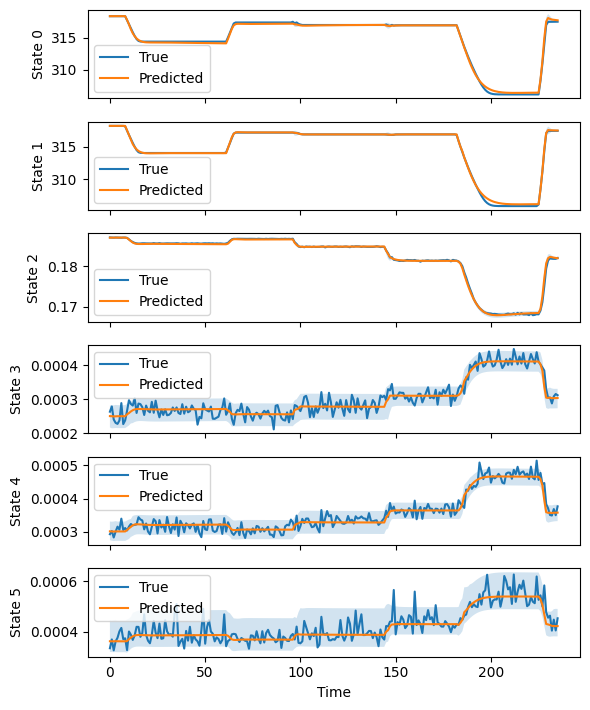

In [8]:
# test CQR model
# note that the coverage value is only senseful for prediction models and not for simulation models as here
simulation_evaluation(test_data.states, test_data.inputs, model_CQR, states=len(keys_states), data_test=test_data, **{'cqr':None})

	⏳Please wait: [██████████████████████████████████████████████████] 100.0% done - loss: -5.7220 - val_loss: -5.7110

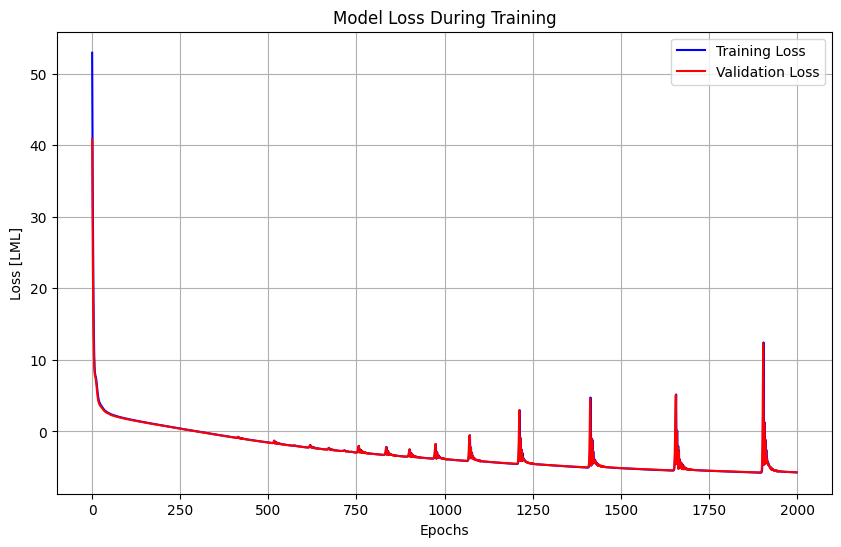

In [9]:
# train BLL model
training_data_BLL = DataClass(training_data_dict, keys_states, keys_inputs, l)

model_BLL = train_BLL.Approximate(training_data_BLL, training_meta_data)
model_BLL.setup(n_neurons=n_neurons, n_epochs=2000, learning_rate=0.004)
model_BLL.train()
# generate symbolic casadi function
model_BLL.get_casadi_model()
# save model
model_BLL.save('./data based models/BLL_model.pkl')

Coverage: 0.9703389830508474
MSE prediction: 0.0022381574355273895
Average MSE: 0.016834310672675917


{'x': array([[3.18405452e+02, 3.18184619e+02, 1.87216023e-01, 2.62054442e-04,
         2.96539027e-04, 3.73816437e-04],
        [3.18405452e+02, 3.18184619e+02, 1.87180823e-01, 2.55695953e-04,
         2.97856000e-04, 3.48913470e-04],
        [3.18405452e+02, 3.18184619e+02, 1.87202624e-01, 2.48649626e-04,
         2.93956376e-04, 3.97383085e-04],
        ...,
        [3.17523665e+02, 3.17429626e+02, 1.81899052e-01, 3.08196965e-04,
         3.68375774e-04, 4.47860797e-04],
        [3.17540342e+02, 3.17428952e+02, 1.81901225e-01, 3.15119705e-04,
         3.49753883e-04, 4.04994557e-04],
        [3.17540255e+02, 3.17428813e+02, 1.82114203e-01, 3.11518570e-04,
         3.76505045e-04, 4.53120588e-04]]),
 'u': array([[7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.00000000e-03],
        [7.65640096e-04, 1.45854867e-02, 6.84984794e-07, 5.0000

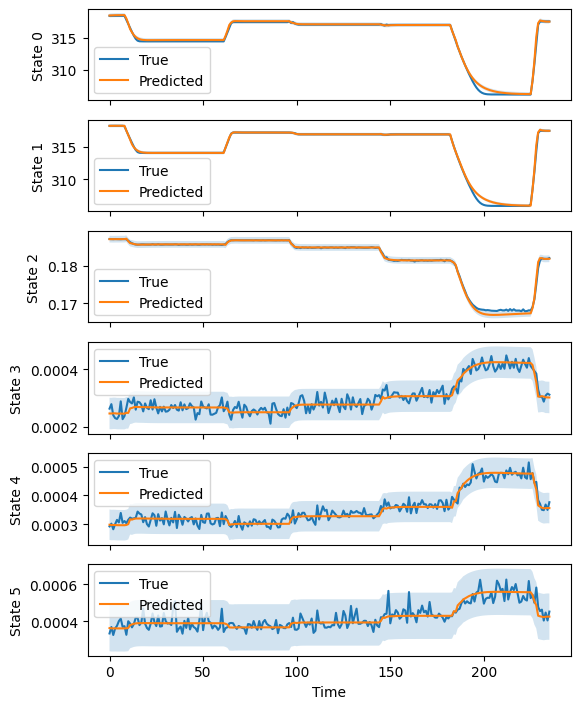

In [10]:
# test BLL model
simulation_evaluation(test_data.states, test_data.inputs, model_BLL, states=len(keys_states), data_test=test_data, **{'bll': model_BLL.std_with_noise})